In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow import keras
from keras import datasets , layers , models

In [2]:
(x_train , y_train) , (x_test , y_test) =  datasets.cifar10.load_data()


170498071/170498071 [==============================] - 7s 0us/step


In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
print(x_train.shape , y_train.shape , x_test.shape , y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [5]:
y_train = y_train.reshape(-1 , ) # flattens the y train array
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [6]:
# Classes for the dataset 10 classes
classes = ['airplane' , 'automobile' , 'bird' , 'cat', 'dog' , 'deer' , 'frog' , 'horse' , 'ship' , 'truck']

In [7]:
def plot_sample(x , y , index):
    plt.figure(figsize = (15 , 2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

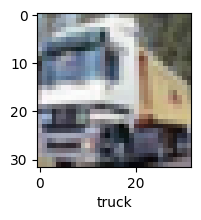

In [8]:
plot_sample(x_train , y_train ,1 )

In [9]:
print(x_train[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


In [10]:
#normalize the values 255: scaling values in range of 0,1
x_train = x_train / 255
x_test = x_test / 255

In [11]:
print(x_train[0])

[[[0.23137255 0.24313725 0.24705882]
  [0.16862745 0.18039216 0.17647059]
  [0.19607843 0.18823529 0.16862745]
  ...
  [0.61960784 0.51764706 0.42352941]
  [0.59607843 0.49019608 0.4       ]
  [0.58039216 0.48627451 0.40392157]]

 [[0.0627451  0.07843137 0.07843137]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509804 0.21568627]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117647 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215686 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941176 0.19607843]
  [0.47058824 0.32941176 0.19607843]
  [0.42745098 0.28627451 0.16470588]]

 ...

 [[0.81568627 0.66666667 0.37647059]
  [0.78823529 0.6        0.13333333]
  [0.77647059 0.63137255 0.10196078]
  ...
  [0.62745098 0.52156863 0.2745098 ]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333333 0.07843137]]

 [[0.70588235 0.54509804 0.37647059]
  [0.67843137 0.48235294 0.16470588]


In [12]:
# CNN Model building
cnn = models.Sequential([
    layers.Conv2D(filters = 64 , kernel_size = (3,3), activation = 'relu', input_shape = (32, 32, 3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(filters = 32 , kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

In [13]:
cnn.compile(optimizer = 'adam',
           loss = 'sparse_categorical_crossentropy',
           metrics = ['accuracy'])

In [14]:
history=cnn.fit(x_train, y_train, epochs =7 )

Epoch 1/7
1563/1563 [==============================] - 130s 82ms/step - loss: 1.5045 - accuracy: 0.4583
Epoch 2/7
1563/1563 [==============================] - 94s 60ms/step - loss: 1.1964 - accuracy: 0.5780
Epoch 3/7
1563/1563 [==============================] - 93s 60ms/step - loss: 1.0765 - accuracy: 0.6226
Epoch 4/7
1563/1563 [==============================] - 93s 59ms/step - loss: 0.9935 - accuracy: 0.6525
Epoch 5/7
1563/1563 [==============================] - 92s 59ms/step - loss: 0.9354 - accuracy: 0.6720
Epoch 6/7
1563/1563 [==============================] - 92s 59ms/step - loss: 0.8849 - accuracy: 0.6899
Epoch 7/7
1563/1563 [==============================] - 94s 60ms/step - loss: 0.8459 - accuracy: 0.7040


In [15]:
cnn.evaluate(x_test, y_test)

313/313 [==============================] - 6s 17ms/step - loss: 0.9471 - accuracy: 0.6742


[0.9470748901367188, 0.6741999983787537]

In [16]:
y_test = y_test.reshape(-1 , )

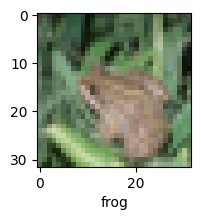

In [17]:
plot_sample(x_test , y_test , 4)

In [18]:
y_pred = cnn.predict(x_test)
y_pred[:4]

313/313 [==============================] - 4s 14ms/step


array([[2.04151813e-02, 2.42952979e-03, 3.58141698e-02, 3.40065688e-01,
        9.83461924e-03, 1.92504480e-01, 1.00913532e-02, 8.67881405e-04,
        3.82571727e-01, 5.40529471e-03],
       [3.31699010e-03, 3.55524779e-03, 3.96665882e-06, 4.77240633e-07,
        1.63436448e-06, 1.92576479e-08, 1.11902935e-07, 1.71730843e-08,
        9.93070245e-01, 5.12741353e-05],
       [3.55460644e-02, 1.30009592e-01, 7.09384447e-04, 1.74084702e-03,
        7.14155671e-04, 5.16843458e-04, 3.67903616e-04, 4.37560782e-04,
        8.11052799e-01, 1.89048406e-02],
       [5.08584738e-01, 1.49513800e-02, 6.95886835e-03, 4.87567770e-04,
        2.09079753e-03, 1.87936021e-05, 1.06806436e-03, 7.28278465e-05,
        4.58614588e-01, 7.15229008e-03]], dtype=float32)

In [19]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:4]

[8, 8, 8, 0]

In [20]:
y_test[:4]

array([3, 8, 8, 0], dtype=uint8)

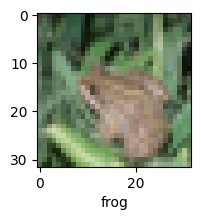

In [21]:
plot_sample(x_test , y_test , 4)

In [22]:
classes[y_classes[4]]

'dog'

In [23]:
y_pred = cnn.predict(x_test)

313/313 [==============================] - 5s 16ms/step


In [24]:
y_pred

array([[2.0415181e-02, 2.4295298e-03, 3.5814170e-02, ..., 8.6788140e-04,
        3.8257173e-01, 5.4052947e-03],
       [3.3169901e-03, 3.5552478e-03, 3.9666588e-06, ..., 1.7173084e-08,
        9.9307024e-01, 5.1274135e-05],
       [3.5546064e-02, 1.3000959e-01, 7.0938445e-04, ..., 4.3756078e-04,
        8.1105280e-01, 1.8904841e-02],
       ...,
       [8.6113380e-04, 4.6856931e-05, 1.1487586e-01, ..., 7.9897337e-02,
        3.0776995e-04, 8.2510995e-04],
       [5.3223830e-02, 1.5255333e-01, 1.4655990e-02, ..., 6.3152455e-02,
        1.8459244e-03, 2.7306371e-03],
       [5.9320934e-07, 3.5872901e-07, 8.8190754e-05, ..., 9.9623585e-01,
        2.5635918e-08, 4.1857751e-07]], dtype=float32)

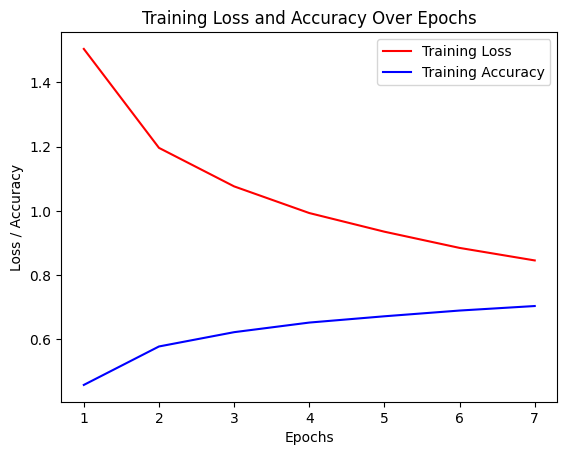

In [25]:
import matplotlib.pyplot as plt

# Extracting loss and accuracy from history object
loss = history.history['loss']
accuracy = history.history['accuracy']
epochs = range(1, len(loss) + 1)

# Plotting loss and accuracy on the same plot
plt.plot(epochs, loss, label='Training Loss', color='red')
plt.plot(epochs, accuracy, label='Training Accuracy', color='blue')

plt.title('Training Loss and Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss / Accuracy')
plt.legend()
plt.show()

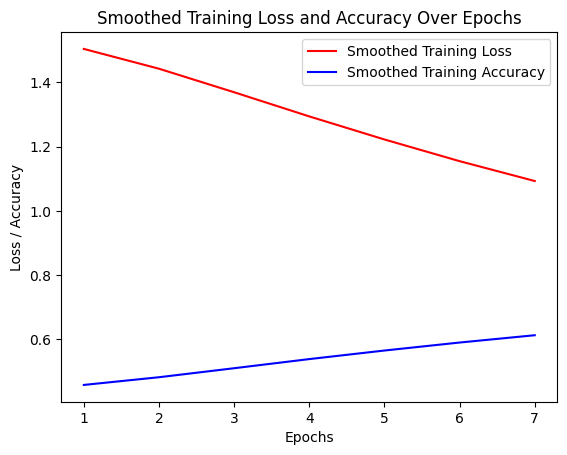

In [26]:
import matplotlib.pyplot as plt

# Extracting loss and accuracy from history object
loss = history.history['loss']
accuracy = history.history['accuracy']
epochs = range(1, len(loss) + 1)

# Applying exponential smoothing with a factor of 0.8
smoothed_loss = [loss[0]]
smoothed_accuracy = [accuracy[0]]
for i in range(1, len(loss)):
    smoothed_loss.append(0.8 * smoothed_loss[-1] + 0.2 * loss[i])
    smoothed_accuracy.append(0.8 * smoothed_accuracy[-1] + 0.2 * accuracy[i])

# Plotting smoothed loss and accuracy on the same plot
plt.plot(epochs, smoothed_loss, label='Smoothed Training Loss', color='red')
plt.plot(epochs, smoothed_accuracy, label='Smoothed Training Accuracy', color='blue')

plt.title('Smoothed Training Loss and Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss / Accuracy')
plt.legend()
plt.show()
